In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Random number generators 

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

# Empirical cumulative distribution function (ECDF)

In [4]:
#Empirical comulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Sampling out of the Binomial distribution

A bank made 100 mortgage loans. 
It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. 
You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05

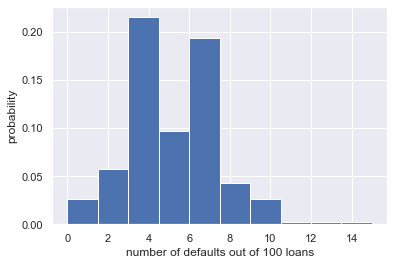

In [5]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

The bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

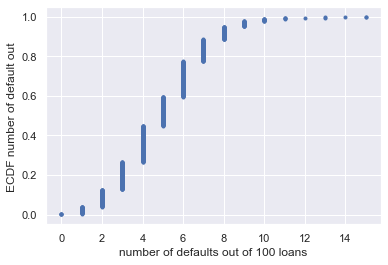

Probability of losing money = 0.022


In [6]:
#Compute ECDF: x, y
x, y =ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker = '.', linestyle = 'none' )
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('ECDF number of default out ')

#plt.margins(0.02)
# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money =np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


# The Binomial CDF

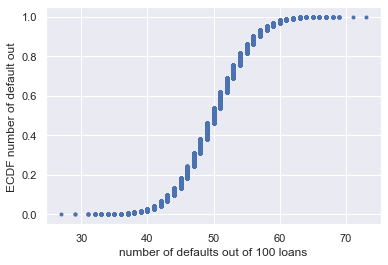

In [7]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_default = np.random.binomial(100, 0.5, size=100000)

# Compute CDF: x, y
x ,y = ecdf(n_default)

# Plot the CDF with axis labels
plt.plot(x, y, marker = '.', linestyle = 'none' )
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('ECDF number of default out ')



# Show the plot
plt.show()


# Binomial PMF (Probability Mass Function)

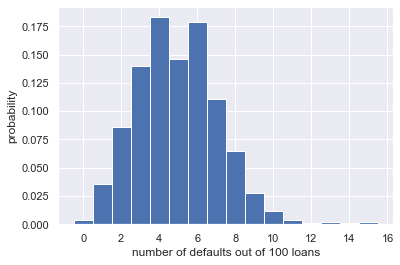

In [8]:
# Compute bin edges: bins
#bins centered on the integers.
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults , bins, density=True)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')


# Show the plot
plt.show()

# Poisson distributions
Poisson distribution is a limit of the Binomial distribution for rare events.

Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). 

In [9]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
#mean np = 10
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))


Poisson:      9.9921 3.131203856346629


In [10]:

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i], size=10000 )

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

n = 20 Binom: 9.958 2.226889310226263
n = 100 Binom: 10.0337 3.0165152593680014
n = 1000 Binom: 9.9941 3.092873290324064


The means are all about the same.
The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

When we have rare events (low p, high n), the Binomial distribution is Poisson. 

Poisson has a single parameter, the mean number of successes per time interval.

## Example no-hitters
Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven

In [11]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0067


 It is not that improbable to see a 7-or-more no-hitter season in a century

# Probability density function (PDF)

Observing a value of a continous variable.

The probability is given by the area under the PDF

# Normal Distribution
Describes a continuous varaible whose PDF has a single symmetric peak

Mean = Indicate where is the center of the peak

St. dev. = Indicate how width is the peak, how spread the data are

*Different that calculates from data

# Normal PDF

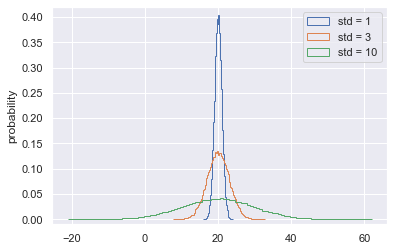

In [12]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)



# Make histograms
plt.hist(samples_std1, density=True,histtype='step', bins = 100)
plt.hist(samples_std3, density=True,histtype='step', bins = 100 )
plt.hist(samples_std10, density=True,histtype='step', bins = 100 )

# Label axes
_ = plt.ylabel('probability')



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show();

# Normal CDF (Comulative density function )

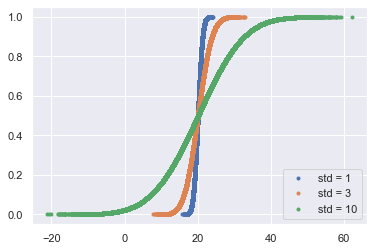

In [13]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)



# Plot CDFs
_ =  plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ =  plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ =  plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; 
the mean and median of a Normal distribution are equal. 

The width of the CDF varies with the standard deviation.

## Example

In [14]:
#Data Belmont winners' times

belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

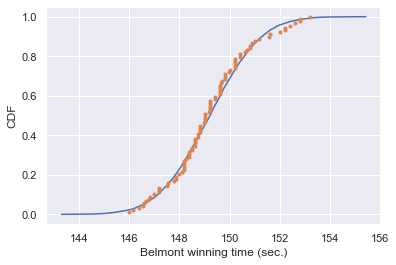

In [15]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x, y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. 

Not major technological or training advances that have  significantly affected the speed at which horses can run this race

In [16]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob =np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000602


There is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

# Exponential Ditribution

The Exponential distribution can describes the waiting times between rare events

In [19]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

# Example 
The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

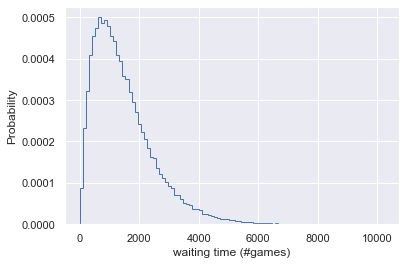

In [20]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715,size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True, histtype='step')


# Label axes
plt.xlabel("waiting time (#games)")
plt.ylabel("Probability")


# Show the plot
plt.show()


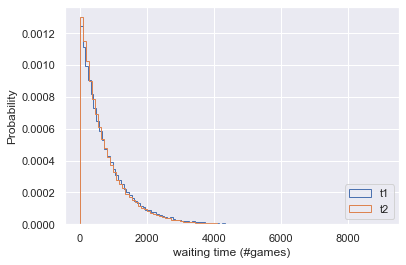

In [21]:
t1 = np.random.exponential(764, size=100000)
t2 = np.random.exponential(715, size=100000)
# Make the histogram
plt.hist(t1, bins=100, density=True, histtype='step')
plt.hist(t2, bins=100, density=True, histtype='step')
# Label axes
plt.xlabel("waiting time (#games)")
plt.ylabel("Probability")

_ = plt.legend(('t1', 't2'), loc='lower right')
# Show the plot
plt.show()

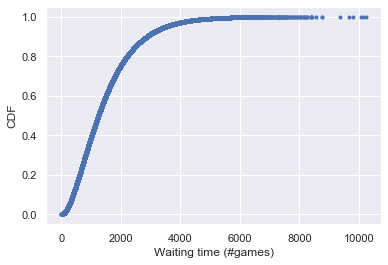

In [22]:

# Get the CDF of the samples and of the data
x, y = ecdf(waiting_times)

# Plot the CDFs and show the plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Waiting time (#games)')
_ = plt.ylabel('CDF')
plt.show()

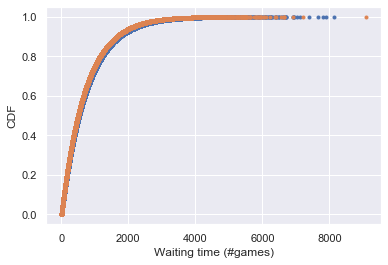

In [23]:
# Get the CDF of the samples and of the data
x1, y1 = ecdf(t1)
x2, y2 = ecdf(t2)

# Plot the CDFs and show the plot
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x2, y2, marker='.', linestyle='none')
_ = plt.xlabel('Waiting time (#games)')
_ = plt.ylabel('CDF')
plt.show()